# Подготовительные моменты

Подключение необходимых библиотек.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml, load_digits
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Классификация встроенного набора данных с рукописными цифрами

Скачивание встроенного набора данных с рукописными цифрами и просмотр изображений первых десяти цифр.

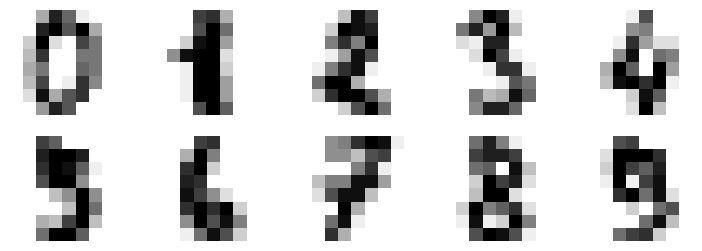

In [ ]:
X, y = load_digits(return_X_y=True)
_, axes = plt.subplots(nrows=2, ncols=5, figsize=(9, 3))
for ax, image in zip(axes.reshape(-1), X):
    ax.set_axis_off()
    ax.imshow(image.reshape(8, 8), cmap=plt.cm.gray_r)

Просмотр размерности набора данных.

In [ ]:
X.shape

(1797, 64)

Просмотр изображений, представленных в виде векторов из 64 чисел.

In [ ]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

Просмотр истинных меток.

In [ ]:
y

array([0, 1, 2, ..., 8, 9, 8])

Разделение набора данных на тренировочную и тестовую выборки.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

Нормализация с помощью `StandardScaler`.

In [ ]:
standard_scaler = StandardScaler()
X_train_st = standard_scaler.fit_transform(X_train)
X_test_st = standard_scaler.transform(X_test)

## Многоклассовая классификация

Обучение `MLPClassifier` на тренировочной выборке и оценка точности предсказания на тестовой выборке.

In [ ]:
mlp = MLPClassifier(random_state=2)
mlp.fit(X_train_st, y_train)
mlp.score(X_test_st, y_test)

0.9814814814814815

Визуализация качества работы классификатора с помощью матрицы спутанности.

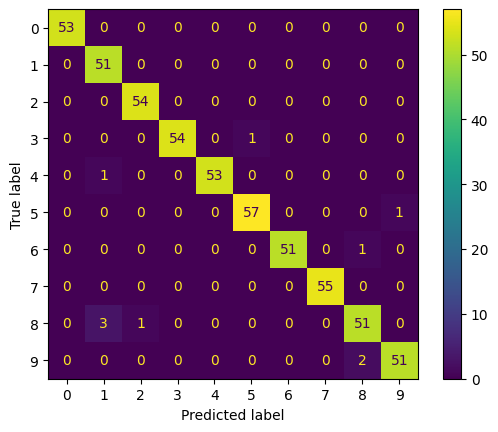

In [ ]:
y_pred = mlp.predict(X_test_st)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

Нахождение всех ошибочно определённых цифр.

In [ ]:
y_loss = pd.DataFrame({"y_true": y_test, "y_pred": y_pred})
y_loss = y_loss[y_loss.y_true != y_loss.y_pred]
y_loss

,y_true,y_pred
0,6,8
22,8,1
43,3,5
71,4,1
271,8,1
303,8,1
365,9,8
387,5,9
418,9,8
438,8,2


Просмотр изображений ошибочно определённых цифр.

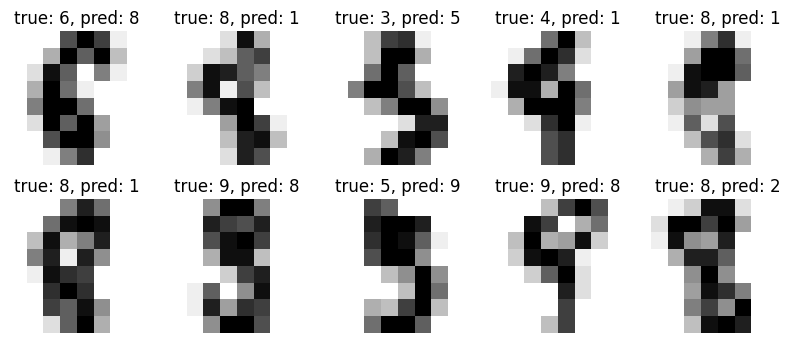

In [ ]:
_, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
for ax, image, true, pred in zip(axes.reshape(-1), X_test[y_loss.index], y_loss.y_true, y_loss.y_pred):
    ax.set_axis_off()
    ax.set_title(f"true: {true}, pred: {pred}")
    ax.imshow(image.reshape(8, 8), cmap=plt.cm.gray_r)

## Бинарная классификация (чётные и нечётные цифры)

Изменение истинных меток (цифр от `0` до `9`) на чётность: `0` или `1`.

In [ ]:
y_train_parity = y_train % 2
y_test_parity = y_test % 2

Обучение `MLPClassifier` на тренировочной выборке и оценка точности предсказания на тестовой выборке.

In [ ]:
mlp_parity = MLPClassifier(random_state=1)
mlp_parity.fit(X_train_st, y_train_parity)
mlp_parity.score(X_test_st, y_test_parity)

0.9888888888888889

Визуализация качества работы классификатора с помощью матрицы спутанности.

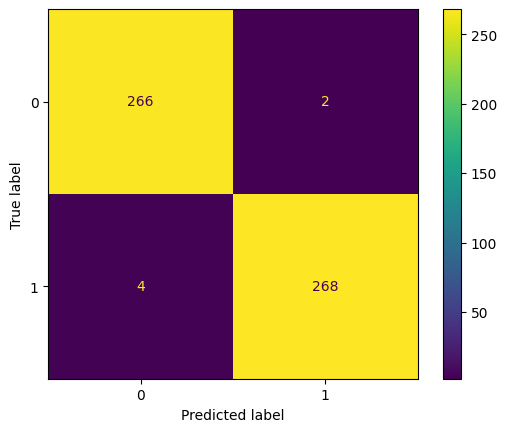

In [ ]:
y_pred_parity = mlp_parity.predict(X_test_st)
ConfusionMatrixDisplay.from_predictions(y_test_parity, y_pred_parity);

Нахождение всех ошибочно определённых цифр.

In [ ]:
y_loss_parity = pd.DataFrame({"y_true": y_test_parity, "y_pred": y_pred_parity})
y_loss_parity = y_loss_parity[y_loss_parity.y_true != y_loss_parity.y_pred]
y_loss_parity

,y_true,y_pred
67,1,0
71,0,1
72,0,1
238,1,0
351,1,0
427,1,0


Просмотр изображений ошибочно определённых цифр.

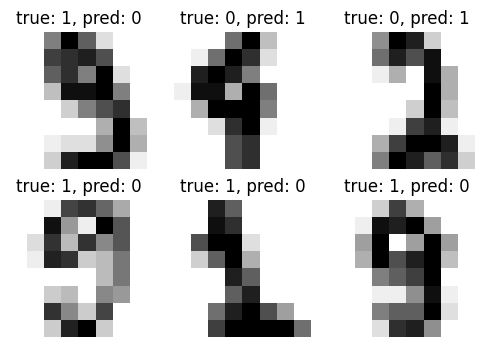

In [ ]:
_, axes = plt.subplots(nrows=2, ncols=3, figsize=(6, 4))
for ax, image, true, pred in zip(
    axes.reshape(-1), X_test[y_loss_parity.index], y_loss_parity.y_true, y_loss_parity.y_pred
):
    ax.set_axis_off()
    ax.set_title(f"true: {true}, pred: {pred}")
    ax.imshow(image.reshape(8, 8), cmap=plt.cm.gray_r)

## Бинарная классификация (ноль и остальные цифры)

Изменение истинных меток (цифры от `0` до `9`) на: `0`, если данная цифра `0`, и `1`, если данная цифра не `0`.

In [ ]:
y_train_zero = (y_train != 0) * 1
y_test_zero = (y_test != 0) * 1

Обучение `MLPClassifier` на тренировочной выборке и оценка точности предсказания на тестовой выборке.

In [ ]:
mlp_zero = MLPClassifier(random_state=0)
mlp_zero.fit(X_train_st, y_train_zero)
mlp_zero.score(X_test_st, y_test_zero)

1.0

Визуализация качества работы классификатора с помощью матрицы спутанности.

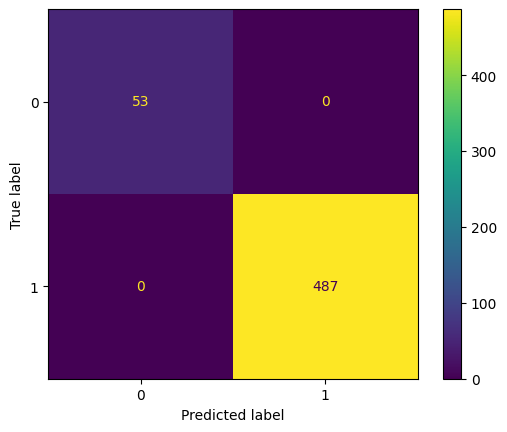

In [ ]:
y_pred_zero = mlp_zero.predict(X_test_st)
ConfusionMatrixDisplay.from_predictions(y_test_zero, y_pred_zero);

# Классификация набора данных MNIST с рукописными цифрами

Скачивание набора данных MNIST с рукописными цифрами и просмотр изображений первых десяти цифр.

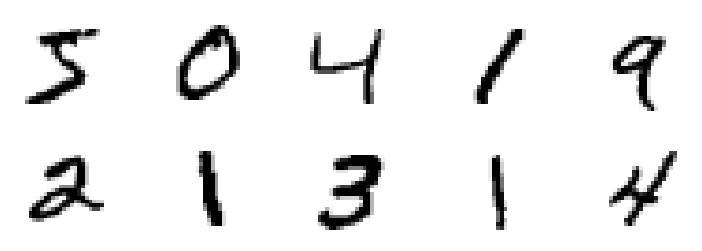

In [2]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
_, axes = plt.subplots(nrows=2, ncols=5, figsize=(9, 3))
for ax, image in zip(axes.reshape(-1), X):
    ax.set_axis_off()
    ax.imshow(image.reshape(28, 28), cmap=plt.cm.gray_r)

Просмотр размерности набора данных.

In [ ]:
X.shape

(70000, 784)

Просмотр изображений, представленных в виде векторов из 784 чисел.

In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Просмотр истинных меток.

In [ ]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

Преобразование истинных меток в числа.

In [3]:
y = y.astype(int)
y

array([5, 0, 4, ..., 4, 5, 6])

Разделение набора данных на тренировочную и тестовую выборки.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Нормализация с помощью `StandardScaler`.

In [5]:
standard_scaler = StandardScaler()
X_train_st = standard_scaler.fit_transform(X_train)
X_test_st = standard_scaler.transform(X_test)

## Многоклассовая классификация

Обучение `MLPClassifier` с подбором наилучшего `random_state` и оценка точности предсказания.

In [ ]:
best_score = 0
best_mlp = None
for i in range(5):
    mlp = MLPClassifier(random_state=i)
    mlp.fit(X_train_st, y_train)
    mlp_score = mlp.score(X_test_st, y_test)
    if best_score < mlp_score:
        best_score = mlp_score
        best_mlp = mlp
best_mlp.random_state, best_score

(2, 0.973)

Обучение `MLPClassifier` с подбором наилучшего `alpha` и оценка точности предсказания.

In [ ]:
best_score = 0
best_mlp = None
for i in 10.0 ** -np.arange(1, 7):
    mlp = MLPClassifier(alpha=i, random_state=2)
    mlp.fit(X_train_st, y_train)
    mlp_score = mlp.score(X_test_st, y_test)
    if best_score < mlp_score:
        best_score = mlp_score
        best_mlp = mlp
best_mlp.alpha, best_score

(np.float64(0.01), 0.9738571428571429)

Обучение `MLPClassifier` с подбором наилучшего `solver` и оценка точности предсказания.

In [ ]:
best_score = 0
best_mlp = None
for i in ["lbfgs", "sgd", "adam"]:
    mlp = MLPClassifier(solver=i, alpha=0.01, max_iter=500, random_state=2)
    mlp.fit(X_train_st, y_train)
    mlp_score = mlp.score(X_test_st, y_test)
    if best_score < mlp_score:
        best_score = mlp_score
        best_mlp = mlp
best_mlp.solver, best_score

('adam', 0.9738571428571429)

Визуализация качества работы классификатора с помощью матрицы спутанности.

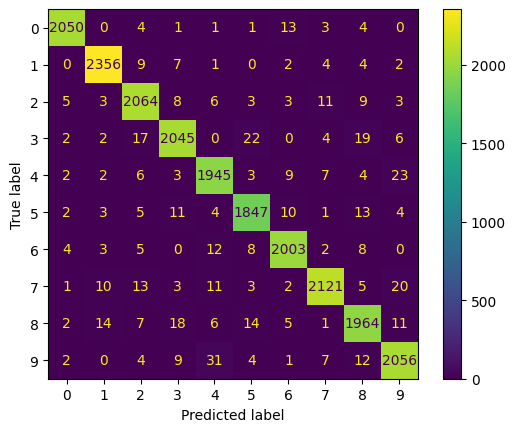

In [ ]:
y_pred = best_mlp.predict(X_test_st)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

Нахождение всех ошибочно определённых цифр.

In [ ]:
y_loss = pd.DataFrame({"y_true": y_test, "y_pred": y_pred})
y_loss = y_loss[y_loss.y_true != y_loss.y_pred]
y_loss.shape[0]

549

Просмотр изображений первых десяти ошибочно определённых цифр.

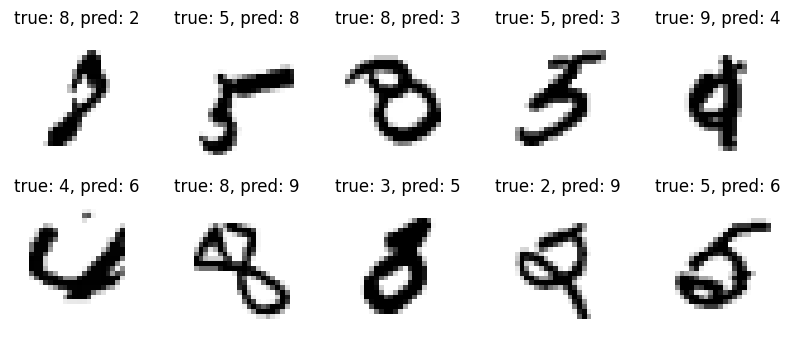

In [ ]:
_, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
for ax, image, true, pred in zip(axes.reshape(-1), X_test[y_loss.index], y_loss.y_true, y_loss.y_pred):
    ax.set_axis_off()
    ax.set_title(f"true: {true}, pred: {pred}")
    ax.imshow(image.reshape(28, 28), cmap=plt.cm.gray_r)

## Бинарная классификация (чётные и нечётные цифры)

Изменение истинных меток (цифр от `0` до `9`) на чётность: `0` или `1`.

In [ ]:
y_train_parity = y_train % 2
y_test_parity = y_test % 2

Обучение `MLPClassifier` с подбором наилучшего `random_state` и оценка точности предсказания.

In [ ]:
best_score = 0
best_mlp_parity = None
for i in range(5):
    mlp = MLPClassifier(random_state=i)
    mlp.fit(X_train_st, y_train_parity)
    mlp_score = mlp.score(X_test_st, y_test_parity)
    if best_score < mlp_score:
        best_score = mlp_score
        best_mlp_parity = mlp
best_mlp_parity.random_state, best_score

(3, 0.9821904761904762)

Обучение `MLPClassifier` с подбором наилучшего `alpha` и оценка точности предсказания.

In [ ]:
best_score = 0
best_mlp_parity = None
for i in 10.0 ** -np.arange(1, 7):
    mlp = MLPClassifier(alpha=i, random_state=3)
    mlp.fit(X_train_st, y_train_parity)
    mlp_score = mlp.score(X_test_st, y_test_parity)
    if best_score < mlp_score:
        best_score = mlp_score
        best_mlp_parity = mlp
best_mlp_parity.alpha, best_score

(np.float64(0.01), 0.9823809523809524)

Обучение `MLPClassifier` с подбором наилучшего `solver` и оценка точности предсказания.

In [ ]:
best_score = 0
best_mlp_parity = None
for i in ["lbfgs", "sgd", "adam"]:
    mlp = MLPClassifier(solver=i, alpha=0.01, max_iter=500, random_state=3)
    mlp.fit(X_train_st, y_train_parity)
    mlp_score = mlp.score(X_test_st, y_test_parity)
    if best_score < mlp_score:
        best_score = mlp_score
        best_mlp_parity = mlp
best_mlp_parity.solver, best_score

('adam', 0.9823809523809524)

Визуализация качества работы классификатора с помощью матрицы спутанности.

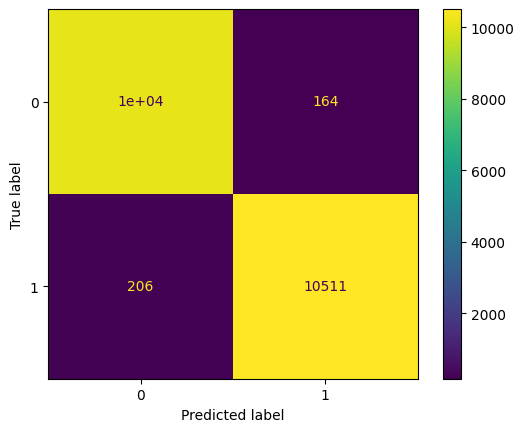

In [ ]:
y_pred_parity = best_mlp_parity.predict(X_test_st)
ConfusionMatrixDisplay.from_predictions(y_test_parity, y_pred_parity);

Нахождение всех ошибочно определённых цифр.

In [ ]:
y_loss_parity = pd.DataFrame({"y_true": y_test_parity, "y_pred": y_pred_parity})
y_loss_parity = y_loss_parity[y_loss_parity.y_true != y_loss_parity.y_pred]
y_loss_parity.shape[0]

370

Просмотр изображений ошибочно определённых цифр.

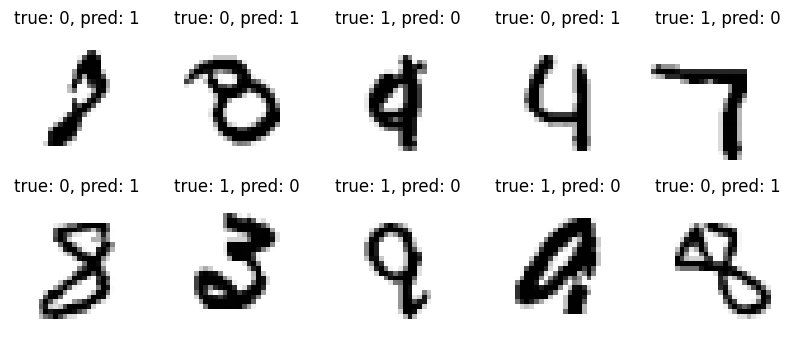

In [ ]:
_, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
for ax, image, true, pred in zip(
    axes.reshape(-1), X_test[y_loss_parity.index], y_loss_parity.y_true, y_loss_parity.y_pred
):
    ax.set_axis_off()
    ax.set_title(f"true: {true}, pred: {pred}")
    ax.imshow(image.reshape(28, 28), cmap=plt.cm.gray_r)

## Бинарная классификация (ноль и остальные цифры)

Изменение истинных меток (цифры от `0` до `9`) на: `0`, если данная цифра `0`, и `1`, если данная цифра не `0`.

In [6]:
y_train_zero = (y_train != 0) * 1
y_test_zero = (y_test != 0) * 1

Обучение `MLPClassifier` с подбором наилучшего `random_state` и оценка точности предсказания.

In [ ]:
best_score = 0
best_mlp_zero = None
for i in range(5):
    mlp = MLPClassifier(random_state=i)
    mlp.fit(X_train_st, y_train_zero)
    mlp_score = mlp.score(X_test_st, y_test_zero)
    if best_score < mlp_score:
        best_score = mlp_score
        best_mlp_zero = mlp
best_mlp_zero.random_state, best_score

(2, 0.9976666666666667)

Обучение `MLPClassifier` с подбором наилучшего `alpha` и оценка точности предсказания.

In [ ]:
best_score = 0
best_mlp_zero = None
for i in 10.0 ** -np.arange(1, 7):
    mlp = MLPClassifier(alpha=i, random_state=2)
    mlp.fit(X_train_st, y_train_zero)
    mlp_score = mlp.score(X_test_st, y_test_zero)
    if best_score < mlp_score:
        best_score = mlp_score
        best_mlp_zero = mlp
best_mlp_zero.alpha, best_score

(np.float64(0.01), 0.9983333333333333)

Обучение `MLPClassifier` с подбором наилучшего `solver` и оценка точности предсказания.

In [7]:
best_score = 0
best_mlp_zero = None
for i in ["lbfgs", "sgd", "adam"]:
    mlp = MLPClassifier(solver=i, alpha=0.01, max_iter=500, random_state=2)
    mlp.fit(X_train_st, y_train_zero)
    mlp_score = mlp.score(X_test_st, y_test_zero)
    if best_score < mlp_score:
        best_score = mlp_score
        best_mlp_zero = mlp
best_mlp_zero.solver, best_score

('adam', 0.9983333333333333)

Визуализация качества работы классификатора с помощью матрицы спутанности.

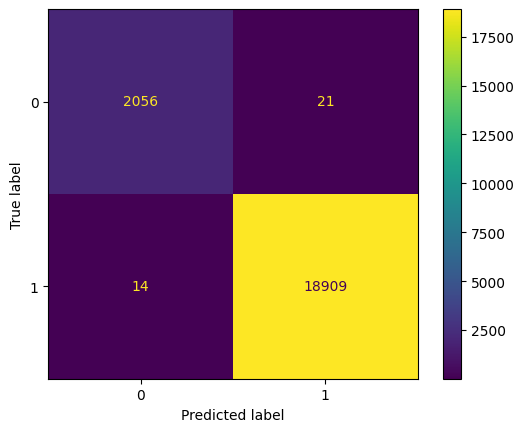

In [8]:
y_pred_zero = best_mlp_zero.predict(X_test_st)
ConfusionMatrixDisplay.from_predictions(y_test_zero, y_pred_zero);

Нахождение всех ошибочно определённых цифр.

In [13]:
y_loss_zero = pd.DataFrame({"y_true": y_test_zero, "y_pred": y_pred_zero})
y_loss_zero = y_loss_zero[y_loss_zero.y_true != y_loss_zero.y_pred]
y_loss_zero.shape[0]

35

Сортировка ошибочно определённых цифр по истинной метке.

In [17]:
y_loss_zero.sort_values("y_true", inplace=True)

Просмотр изображений ошибочно определённых цифр.

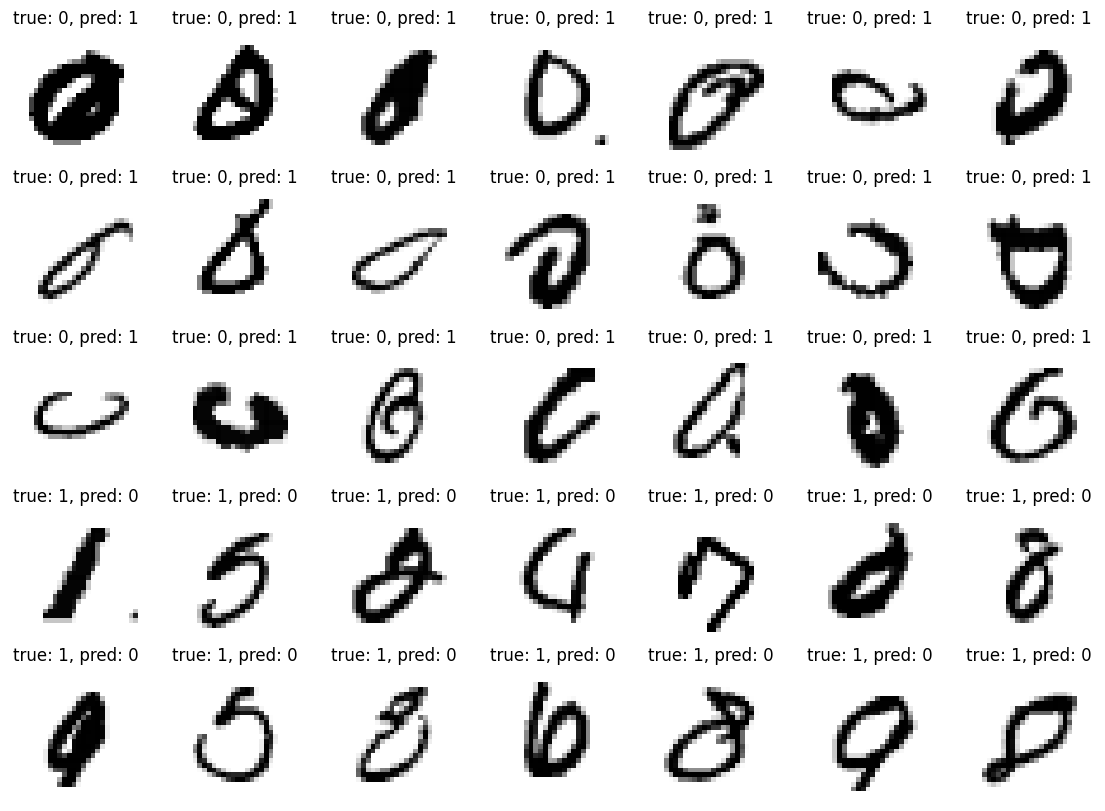

In [18]:
_, axes = plt.subplots(nrows=5, ncols=7, figsize=(14, 10))
for ax, image, true, pred in zip(
    axes.reshape(-1), X_test[y_loss_zero.index], y_loss_zero.y_true, y_loss_zero.y_pred
):
    ax.set_axis_off()
    ax.set_title(f"true: {true}, pred: {pred}")
    ax.imshow(image.reshape(28, 28), cmap=plt.cm.gray_r)